# Modelo 8: Concentración fija Pt 28%, Pd 45%, Co 27%, de 5 nm

In [2]:
from sys import path
import os
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.core_shell_f as cs
import myfuncions.randomize_f as ranf
import myfuncions.tools_f as tools
import subprocess as sbp
import myfuncions.graphs_f as gf
import pandas as pd
import plotly.express as px
import numpy as np

a = [1,0.75,0.5,0.25,0,-0.25,-0.5,-0.75,-1]
b = [0,0.07,0.14,0.21,0.27001,0.44,0.64,0.83,1]
print(len(a), len(b))

9 9


Quita el porcentaje radial de átomos en 0.05
per es 0.05, p es 19.0
p(x)=1*x^(1/(0.05-0) -1) + 0
Cambia elementos prob a atpos
rand
Cambia en potencia el porcentaje radial de átomos en {'Pt': 0.28, 'Pd': 0.45, 'Co': 0.27}
per es 0.27, p es 0.36986301369863006
0.40114693429252 0.22614402780137444 0.10093770954250647 0.0
pow
a=-1,b=1
atomos totales : 4091
Pd : 44.97677829381569 %, 1840
Pt : 28.03715472989489 %, 1147
Co : 26.986066976289415 %, 1104


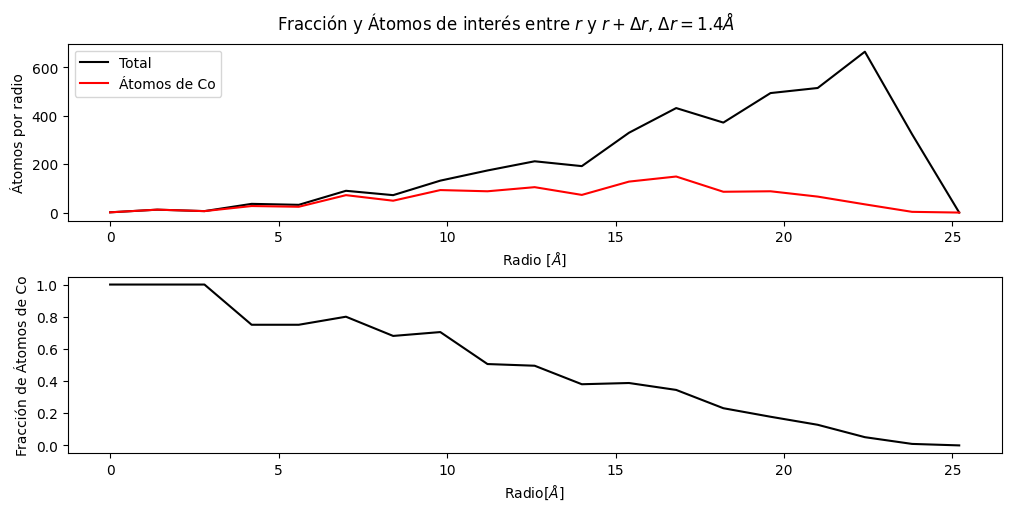

In [24]:
i = 8
coords = cs.cubeShell(14,2.775,'fcc')
coords = cs.sphericalShave(coords,25)
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos =  ranf.pol_ab_rad_remove(atpos,0.05,25,1)
atpos, eleList, mode = ranf.cambiar_elementos_prob(atpos,{'Pt':0.38, 'Pd':0.62})
print(mode)
atpos, eleList, mode = ranf.pol_ab_rad_ch(atpos, eleList, {'Pt':0.28, 'Pd':0.45, 'Co':0.27},49, 'Co',a[i],b[i])
print(mode)
print(f'a={a[i]},b={b[i]}')
tools.show_percent(atpos,eleList)
gf.plot_dump_f_y_atpr(atpos,'Co',1.4)


In [25]:
name=f'M0-polrad_{i}.xyz'
tools.wXYZ(atpos,name)

sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'M0-polrad_8.xyz'], returncode=0)

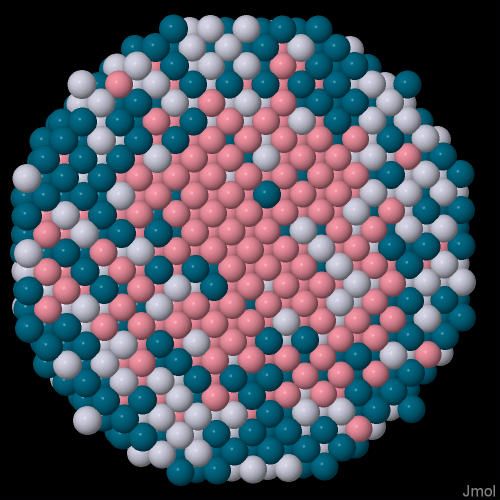

In [26]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

M0-polrad_8.ini


In [27]:

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
 
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 300.0 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin 300.0 300.0 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')

0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Cambia etiquetas a "atpos"
jala


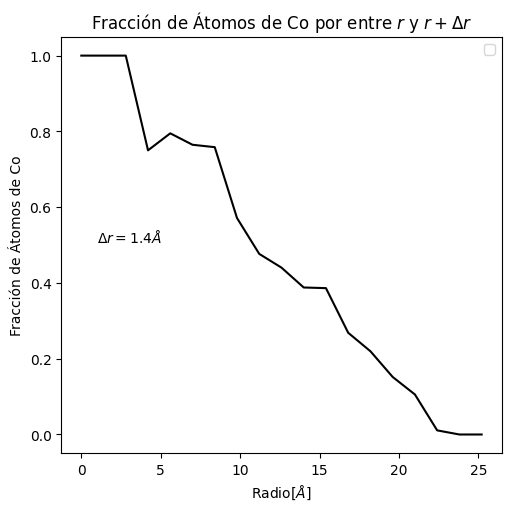

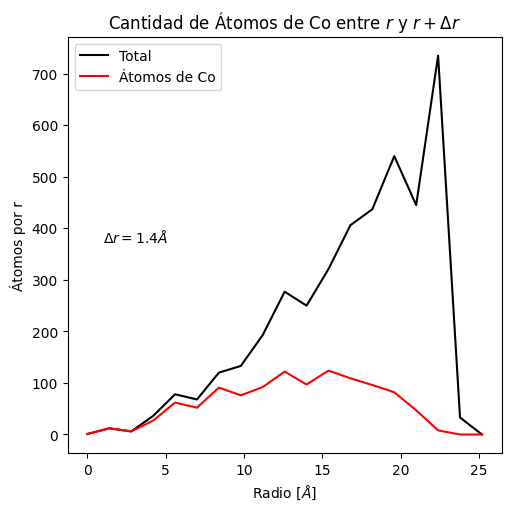

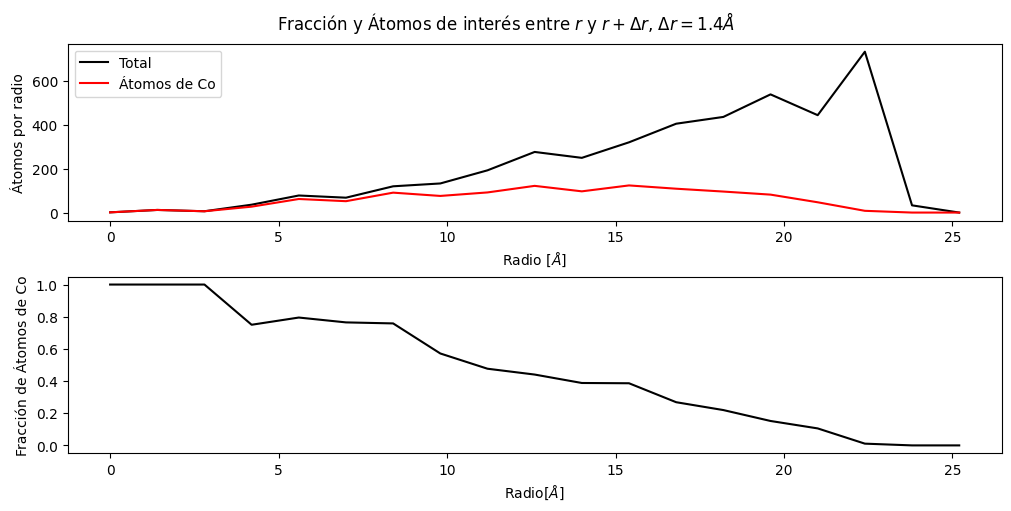

In [28]:
datpos, deleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})

gf.dump_graficar_fracc_atpr(datpos,'Co',1.4)
gf.dump_graficar_atpr(datpos,'Co',1.4)
gf.plot_dump_f_y_atpr(datpos,'Co',1.4)

In [29]:
tools.wXYZ(datpos,f'{name[:-4]}_d2.xyz')
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d2.xyz'])

CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'M0-polrad_8_d2.xyz'], returncode=0)

In [30]:
import PDF.runner as pdf
pdf.run_pdf(f'{name[:-4]}_d2.xyz', dir_actual, 2600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\17_de_mayo\p3

 -0.180509999      -7.71334982      -22.7040005              46   203914.000    
  -3.70223999      -3.77965999      -22.7003002              78   203914.000    
   1.68800000E-02  -3.62535000      -22.8407993              46   203914.000    
        4091  atomos      8366095  pares 
 Rango de distancias    2.26728535     -   48.4979630    
 Distancias promedio    24.3279743    
 Factor de normalizacion    421117.781    



In [3]:
exp = pd.DataFrame()

df_exp = pd.read_csv('C:/Users/guill/OneDrive/Documentos/Tesis/Proyect/04_26_2024_comparision_variables/Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index *= 0.02

exp['exp'] = rest_df_exp

dx = 0.02

In [7]:
name=f'M0-polrad_8.xyz'
M1 = pd.read_csv('M0-polrad_8_d2.txt', sep='\s+')
M = pd.DataFrame()
#M.index = M0['#r(A)']

M['M1'] = M1['G(r)']

ScaleX= 1.018
#M.index *= dx*ScaleX
M.index = (M.index + 1)*dx*ScaleX

for i in [1]:
    a = M[M[f'M{i}']== max(M[f'M{i}'])].index[0]
    b = 0.33 #### Al parecer este es el originario de todo lo que yo estaba haciendo
    c = b/(float(M[f'M{i}'][a]))
    M[f'M{i}'] *= c

In [8]:
F = pd.DataFrame()
exp = exp.astype(float)
M.astype(float)
F = M.join(exp, how='outer')

for i in [1]:
    F[f'M{i}'].loc[0] = 0

F = F.interpolate(method='quadratic')
#F['M0'] = F['M0'].interpolate(method='zero')
#F = F.fillna(method='ffill') 
#F = F.fillna(0)

for i in [1]:
    rest = F['exp'] - F[f'M{i}']
    error1 = np.sum(rest.loc[:44]**2)
    error_p1 = np.sqrt(error1/4321)
    #error2 = np.sum(rest.loc[44:]**2)
    #error_p2 = np.sqrt(error2/4321)
    #print(f'Para M{i} el error 1er es {error1}, el segundo es {error2}, y el error porcentual es {error_p1} y {error_p2}')
    print(f'Para M{i} el error es {error1}, y ECM {error_p1}')

#print(F.to_string())

fig = px.line(F, template='simple_white', title='Pair Distribution Functions of 9 Models',
    width=1000, height=500)
fig.update_layout(
    font_family="serif",
    title_font_family="serif")
fig.update_xaxes(title_text='G(r)')
fig.update_yaxes(title_text='r [A]')
fig.show()

Para M1 el error es 0.6526000886819968, y ECM 0.012289421252602002
